### Check FDTs for K2 components

Anxiang's FDTs with bosonic (merged) index in the third slot.
**(a)**
$$
K_2^{112} = \tanh\tfrac{\beta\omega_1}{2} \left[ 
(K_2^{221})^* - K_2^{212}
\right] 
+ \tanh\tfrac{\beta\omega_2}{2} \left[ 
(K_2^{221})^* - K_2^{122}
\right]
$$

**(b)**
$$
K_2^{121} = \tanh\tfrac{\beta\omega_1}{2} \left[ 
(K_2^{212})^* - K_2^{221}
\right]
+ \coth\tfrac{\beta\omega_3}{2} \left[ 
(K_2^{212})^* - K_2^{122}
\right]
$$

**(c)**
$$
K_2^{211} = \tanh\tfrac{\beta\omega_2}{2} \left[ 
(K_2^{122})^* - K_2^{221}
\right]
+ \coth\tfrac{\beta\omega_3}{2} \left[ 
(K_2^{122})^* - K_2^{212}
\right]
$$

**(d)**
$$
\begin{aligned}
K_2^{111} &= 
\tanh\tfrac{\beta\omega_2}{2} \coth\tfrac{\beta\omega_3}{2} K_2^{122}
+ \tanh\tfrac{\beta\omega_1}{2} \coth\tfrac{\beta\omega_3}{2} K_2^{212} \\
&\quad + \tanh\tfrac{\beta\omega_1}{2} \tanh\tfrac{\beta\omega_2}{2} K_2^{221} \\
&\quad + \left[
(1+\tanh\tfrac{\beta\omega_2}{2} \coth\tfrac{\beta\omega_3}{2}) K_2^{122}
\right. \\
&\qquad + (1+\tanh\tfrac{\beta\omega_1}{2} \coth\tfrac{\beta\omega_3}{2}) K_2^{212} \\
&\qquad \left. + (1+\tanh\tfrac{\beta\omega_1}{2} \tanh\tfrac{\beta\omega_2}{2}) K_2^{221}
\right]^*
\end{aligned}
$$

To convert to our convention:
- expand 1->12, 2->11 in the third slot.
- swap second and third Keldysh index

In [2]:
using TCI4Keldysh
using PythonCall
using PythonPlot

### $K_{2'}^p$

In [4]:
PSFpath = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
base_path = "SIAM_u=0.50"
channel = "pQFT"
flavor_idx = 2
(γ, sigmak) = TCI4Keldysh.read_broadening_params(base_path; channel=channel)
broadening_kwargs = TCI4Keldysh.read_broadening_settings(joinpath(TCI4Keldysh.datadir(), base_path); channel=channel)
broadening_kwargs[:estep] = 50
broadening_kwargs[:emin] = 2.5e-5
broadening_kwargs[:emax] = 30.0;

In [5]:
ommax = 0.2
R = 8
prime = true
ωs_ext = ntuple(_ -> TCI4Keldysh.KF_grid_bos(ommax, R), 2)

K2pprime = TCI4Keldysh.precompute_K2r(
        PSFpath, flavor_idx, "KF";
        ωs_ext=ωs_ext,
        channel=channel,
        prime=prime,
        broadening_kwargs...
        )
nothing

Loading stuff:   0.048969 seconds (10.83 k allocations: 918.078 KiB, 94.30% compilation time)
Creating Broadened PSFs:  15.528475 seconds (14.91 M allocations: 22.919 GiB, 18.04% gc time, 29.06% compilation time)
All the rest:   1.479038 seconds (1.40 M allocations: 707.903 MiB, 2.11% gc time, 73.09% compilation time)
Loading stuff:   0.001599 seconds (454 allocations: 201.406 KiB)
Creating Broadened PSFs:   9.273344 seconds (13.28 M allocations: 22.825 GiB, 18.35% gc time)
All the rest:   0.379587 seconds (119.29 k allocations: 628.661 MiB, 1.35% gc time)
Loading stuff:   0.001529 seconds (454 allocations: 201.406 KiB)
Creating Broadened PSFs:   9.602228 seconds (13.28 M allocations: 22.825 GiB, 17.93% gc time)
All the rest:   0.364202 seconds (119.29 k allocations: 628.660 MiB, 3.33% gc time)
  Compute K2...
size of Σ_vec:(513, 2, 2)
size of Σ_slanted: (257, 257, 2, 2)
size of Σ_vec:(513, 2, 2)
size of Σ_slanted: (257, 257, 2, 2)
Loading stuff:   0.020896 seconds (6.16 k allocations:

Setup

In [5]:
ωconvMat = TCI4Keldysh.channel_trafo(channel)
display(ωconvMat)
K2pmat = TCI4Keldysh.channel_trafo_K2(channel, prime)
display(K2pmat)
β = TCI4Keldysh.dir_to_beta(PSFpath)
Nbos(om::Float64) = abs(om)>1.e-12 ? coth(β*om/2.0) : 0.0
Nfer(om::Float64) = tanh(β*om/2.0)
ωint, s = TCI4Keldysh.trafo_grids_offset(ωs_ext, K2pmat);

4×3 Matrix{Int64}:
  0  -1   0
 -1   0  -1
  1   1   0
  0   0   1

3×2 Matrix{Int64}:
  1   0
 -1  -1
  0   1

In [18]:
(a,b) = (5,12)
@show K2pmat * [ωs_ext[1][a], ωs_ext[2][b]] 
w_int =  K2pmat * [a,b] .+ s
@show [ωint[1][w_int[1]], ωint[2][w_int[2]], ωint[3][w_int[3]]];

K2pmat * [(ωs_ext[1])[a], (ωs_ext[2])[b]] = [-0.19375, 0.3765625, -0.1828125]
[(ωint[1])[w_int[1]], (ωint[2])[w_int[2]], (ωint[3])[w_int[3]]] = [-0.19375, 0.3765625, -0.1828125]


Compute FDT

In [20]:
display(TCI4Keldysh.merge_iK_K2((1,1,2,2), channel, prime))
display(TCI4Keldysh.merge_iK_K2((2,1,1,1), channel, prime))
display(TCI4Keldysh.merge_iK_K2((1,1,2,1), channel, prime))
display(TCI4Keldysh.merge_iK_K2((2,1,2,2), channel, prime))
k2inp = reshape(collect(1:8) .+ 0.0*im,2,2,2)
unfolded = TCI4Keldysh.unfold_K2(k2inp, channel, prime)
@show abs(unfolded[1,1,2,2]-k2inp[2,1,2])
@show abs(unfolded[2,1,1,1]-k2inp[2,1,1])
@show abs(unfolded[1,1,2,1]-k2inp[2,1,1])
@show abs(unfolded[2,1,2,2]-k2inp[1,1,2])

(2, 1, 2)

(2, 1, 1)

(2, 1, 1)

(1, 1, 2)

abs(unfolded[1, 1, 2, 2] - k2inp[2, 1, 2]) = 0.0
abs(unfolded[2, 1, 1, 1] - k2inp[2, 1, 1]) = 0.0
abs(unfolded[1, 1, 2, 1] - k2inp[2, 1, 1]) = 0.0
abs(unfolded[2, 1, 2, 2] - k2inp[1, 1, 2]) = 0.0


0.0

In [8]:
wd1 = 1
wd2 = 2
function rhs(w1::Int,w2::Int)
    w_int = K2pmat * [w1,w2] .+ s
    return Nbos(ωint[wd1][w_int[wd1]]) * (conj(K2pprime[w1,w2,2,1,1]) - K2pprime[w1,w2,2,1,1]) + 
            Nfer(ωint[wd2][w_int[wd2]]) * (conj(K2pprime[w1,w2,2,1,1]) - K2pprime[w1,w2,1,1,2])
end

lhs(w1::Int,w2::Int) = K2pprime[w1,w2,2,1,2]

lhs (generic function with 1 method)

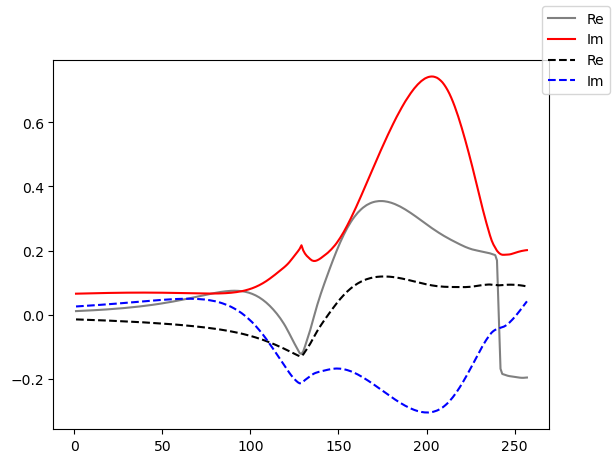

argmax(abs.(K2pprime)) = CartesianIndex(83, 152, 2, 1, 1)


In [9]:
fig, axs = subplots()
ws = 1:2^8+1
nn = maximum(abs.(K2pprime[:,:,2,1,2]))
axs.plot(ws, real.(rhs.(ws,17)) ./ nn; label="Re", color="gray")
axs.plot(ws, imag.(rhs.(ws,17)) ./ nn; label="Im", color="red")
axs.plot(ws, real.(lhs.(ws,17)) ./ nn; linestyle="--", color="black", label="Re")
axs.plot(ws, imag.(lhs.(ws,17)) ./ nn; linestyle="--", color="blue", label="Im")
@show argmax(abs.(K2pprime))
fig.legend()
display(fig)

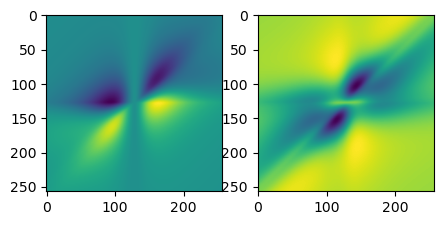

In [25]:
ws = 1:2^8+1
# lhs
fig, axs = subplots(1,2; figsize=(5,10))
L = zeros(ComplexF64, length(ws), length(ws))
for i in ws
    for j in ws
        L[i,j] = lhs(i,j)
    end
end
axs[0].imshow(real.(L))
axs[1].imshow(imag.(L))
display(fig)
# rhs
# wd1 = 1
# wd2 = 2
# for ik in Iterators.product(1:2,1:2,1:2)
#     for ik2 in Iterators.product(1:2,1:2,1:2)
#             function rhs(w1::Int,w2::Int)
#                 w_int = K2pmat * [w1,w2] .+ s
#                 return Nbos(ωint[wd1][w_int[wd1]]) * (conj(K2pprime[w1,w2,2,1,1]) - K2pprime[w1,w2,ik...]) + 
#                         Nfer(ωint[wd2][w_int[wd2]]) * (conj(K2pprime[w1,w2,2,1,1]) - K2pprime[w1,w2,ik2...])
#             end
#             fig, axs = subplots(1,2; figsize=(5,10))
#             R = zeros(ComplexF64, length(ws), length(ws))
#             for i in ws
#                 for j in ws
#                     R[i,j] = rhs(i,j)
#                 end
#             end
#             axs[0].imshow(real.(R))
#             axs[1].imshow(imag.(R))
#             display(fig)
#     end
# end

### Relations derived from 4-point FDT of vertex

In [2]:

PSFpath = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
base_path = "SIAM_u=0.50"
channel = "pQFT"
flavor_idx = 2
(γ, sigmak) = TCI4Keldysh.read_broadening_params(base_path; channel=channel)
broadening_kwargs = TCI4Keldysh.read_broadening_settings(joinpath(TCI4Keldysh.datadir(), base_path); channel=channel)
broadening_kwargs[:estep] = 50
broadening_kwargs[:emin] = 2.5e-5
broadening_kwargs[:emax] = 30.0;

In [ ]:
ommax = 0.005
R = 8
prime = true
ωs_ext = ntuple(_ -> TCI4Keldysh.KF_grid_bos(ommax, R), 2)

K2pprime = TCI4Keldysh.precompute_K2r(
        PSFpath, flavor_idx, "KF";
        ωs_ext=ωs_ext,
        channel=channel,
        prime=prime,
        broadening_kwargs...
        )
nothing

Loading stuff:   0.016248 seconds (454 allocations: 201.406 KiB)
Creating Broadened PSFs:  10.811250 seconds (13.28 M allocations: 22.825 GiB, 27.18% gc time)
All the rest:   0.368745 seconds (118.88 k allocations: 625.821 MiB, 11.38% gc time, 1.47% compilation time)
Loading stuff:   0.014554 seconds (454 allocations: 201.406 KiB)
Creating Broadened PSFs:  10.479956 seconds (13.28 M allocations: 22.825 GiB, 23.19% gc time)
All the rest:   0.381127 seconds (119.29 k allocations: 628.660 MiB, 12.60% gc time)
Loading stuff:   0.016055 seconds (454 allocations: 201.406 KiB)
Creating Broadened PSFs:  10.373915 seconds (13.28 M allocations: 22.825 GiB, 18.10% gc time)
All the rest:   0.307268 seconds (119.29 k allocations: 628.660 MiB, 1.15% gc time)
  Compute K2...
size of Σ_vec:(513, 2, 2)
size of Σ_slanted: (257, 257, 2, 2)
size of Σ_vec:(513, 2, 2)
size of Σ_slanted: (257, 257, 2, 2)
Loading stuff:   0.051539 seconds (1.18 k allocations: 964.641 KiB)
Creating Broadened PSFs:   0.300886 s

In [42]:
Ntrafo = [-1 -1; 0 1]
ωconvMat = TCI4Keldysh.channel_trafo(channel)
β = TCI4Keldysh.dir_to_beta(PSFpath)
omN, shift = TCI4Keldysh.trafo_grids_offset(ωs_ext, Ntrafo);
@show length.(omN)
display(shift)

2-element Vector{Int64}:
 515
   0

length.(omN) = (513, 257)


In [45]:
sig = 1.0
N2(w1::Int,w2::Int) = tanh(β*omN[1][(Ntrafo * [w1,w2] .+ shift)[1]]/2)
N4(w1::Int,w2::Int) = tanh(β*omN[2][(Ntrafo * [w1,w2] .+ shift)[2]]/2)
function lhs(w1::Int, w2::Int)
    return K2pprime[w1,w2,2,1,2] - sig*K2pprime[w1,w2,1,1,2] +  N2(w1,w2) * K2pprime[w1,w2,2,2,2]
end

function rhs(w1::Int, w2::Int)
    return ((-sig + N2(w1,w2))/(sig+N4(w1,w2)))*conj(K2pprime[w1,w2,2,2,1] + sig*K2pprime[w1,w2,1,2,1] + N4(w1,w2)*K2pprime[w1,w2,1,1,2])
end

rhs (generic function with 1 method)

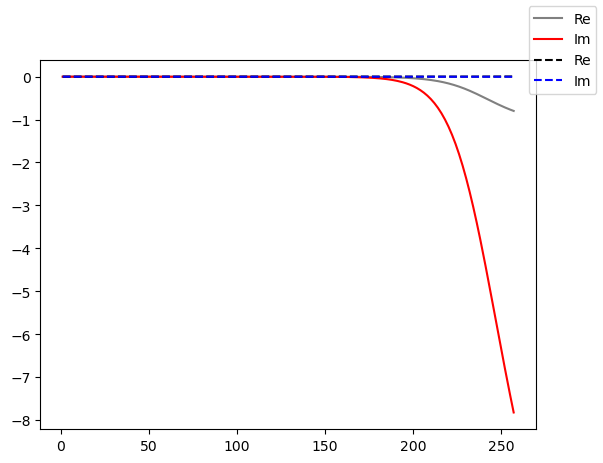

argmax(abs.(K2pprime)) = CartesianIndex(257, 257, 1, 2, 1)


In [46]:
fig, axs = subplots()
ws = 1:2^8+1
nn = 1.0
axs.plot(ws, real.(rhs.(ws,17)) ./ nn; label="Re", color="gray")
axs.plot(ws, imag.(rhs.(ws,17)) ./ nn; label="Im", color="red")
axs.plot(ws, real.(lhs.(ws,17)) ./ nn; linestyle="--", color="black", label="Re")
axs.plot(ws, imag.(lhs.(ws,17)) ./ nn; linestyle="--", color="blue", label="Im")
@show argmax(abs.(K2pprime))
fig.legend()
display(fig)

#### 3-point FDTs for correlators

In [207]:
PSFpath = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
base_path = "SIAM_u=0.50"
channel = "pQFT"
prime = false
flavor_idx = 2
(γ, sigmak) = TCI4Keldysh.read_broadening_params(base_path; channel=channel)
broadening_kwargs = TCI4Keldysh.read_broadening_settings(joinpath(TCI4Keldysh.datadir(), base_path); channel=channel)
broadening_kwargs[:estep] = 50
broadening_kwargs[:emin] = 2.5e-5
broadening_kwargs[:emax] = 30.0;

In [243]:
# compute correlator
R = 8
ommax = 0.01
ωs_ext = ntuple(_ -> TCI4Keldysh.KF_grid_bos(ommax, R), 2)
T = TCI4Keldysh.dir_to_T(PSFpath)
ops = ["Q12", "F3", "F3dag"]
G = TCI4Keldysh.FullCorrelator_KF(
    PSFpath, ops;
    T=T, flavor_idx=flavor_idx, ωs_ext=ωs_ext, ωconvMat=TCI4Keldysh.channel_trafo_K2(channel, prime), γ=γ, sigmak=sigmak, broadening_kwargs...
    )
Gval = TCI4Keldysh.precompute_all_values(G);

Loading stuff:   0.087628 seconds (1.20 k allocations: 965.859 KiB)
Creating Broadened PSFs:   2.078769 seconds (3.85 M allocations: 4.660 GiB, 9.57% gc time)
All the rest:   2.117527 seconds (42.65 k allocations: 395.713 MiB, 87.97% gc time)


In [324]:
using StaticArrays
using LinearAlgebra

tfac = 1.0

"""
Finite-difference derivative of FullCorrelator_KF in dimension d: ∂G(ω1,…,ωD)/∂ωd, d∈{1,…,D}
"""
function eval_dG(G::TCI4Keldysh.FullCorrelator_KF{D}, d::Int, iw::Vararg{Int,D}) :: Vector{ComplexF64} where {D}
    sgn = iw[d]==length(G.ωs_ext[d]) ? -1 : 1
    iw2 = ntuple(i -> iw[i] + (i==d ? sgn : 0), D)
    valiw = TCI4Keldysh.evaluate_all_iK(G, iw...)
    valiw2 = TCI4Keldysh.evaluate_all_iK(G, iw2...)
    dw = G.ωs_ext[d][iw2[d]] - G.ωs_ext[d][iw[d]]
    return (valiw2 .- valiw)./dw
end

# """
# Finite-difference directional derivative of FullCorrelator_KF in direction v
# """
# function eval_dG(G::TCI4Keldysh.FullCorrelator_KF{D}, v::NTuple{D,Int}, iw::Vararg{Int,D}) :: Vector{ComplexF64} where {D}
#     ret = zeros(ComplexF64, 2^D)
#     for i in 1:D
#         if v[i] != 0
#             ret .+= v[i] * eval_dG(G, i, iw...)
#         end
#     end
#     return ret
# end


"""
FDT without anomalous terms for components [12] [13] [24]
"""
function eval_3pt_FDT(G::TCI4Keldysh.FullCorrelator_KF{2}, T::Float64, ij::Tuple{Int,Int}, iw::Vararg{Int,2})
    zetas = (-1) .^ G.isBos
    notij = only(setdiff(1:3, ij))
    w = ntuple(i -> G.ωs_ext[i][iw[i]], 2)
    wint = G.ωconvMat * SA[w...]
    res = zero(ComplexF64)
    gval = TCI4Keldysh.evaluate_all_iK(G, iw...)
    for i in ij
        j = only(setdiff(1:3, (i,notij)))
        comp1 = LinearIndices((2,2,2))[ntuple(k -> k==notij ? 2 : 1, 3)...]
        comp2 = LinearIndices((2,2,2))[ntuple(k -> k==j ? 2 : 1, 3)...]
        if zetas[i]==1 || (abs(wint[i]/(2*tfac*T))>1.e-12)
            # non-divergent case
            res += (tanh(wint[i]/(2*tfac*T)) ^ zetas[i]) * (conj(gval[comp1...]) - gval[comp2...])
        else
            # coth evaluated close to 0

            # s = (SA[ntuple(k -> k==i ? 1 : 0, 3)...] \ G.ωconvMat)'
            # wp = round.(Int, SA[iw...] .+ s)
            # wm = round.(Int, SA[iw...] .- s)
            # if any(wp .< 0) || any(wp .> length.(ωs_ext)) || any(wm .< 0) || any(wm .> length.(ωs_ext))
            #     @warn "($(iw[1]),$(iw[2])) OOB"
            #     return zero(ComplexF64)
            # end
            # gvalp = TCI4Keldysh.evaluate_all_iK(G, wp...)
            # gvalm = TCI4Keldysh.evaluate_all_iK(G, wm...)
            # dw = (G.ωconvMat * SA[ntuple(k -> G.ωs_ext[k][wp[k]], 2)...])[i] - (G.ωconvMat * SA[ntuple(k -> G.ωs_ext[k][wm[k]], 2)...])[i]
            # res += 2T * (gvalp[comp1...] - gvalm[comp2...]) / dw
            
            d = findfirst(G.ωconvMat[i,:] .!= 0)
            res += 2T * (eval_dG(G, d, iw...)[comp1] - (eval_dG(G, d, iw...)[comp2])) / G.ωconvMat[i,d]

        end
    end
    return res
end

"""
FDT without anomalous terms for component [123]
Assumes that there is at most 1 bosonic operator
"""
function eval_3pt_FDT(G::TCI4Keldysh.FullCorrelator_KF{2}, T::Float64, iw::Vararg{Int,2})
    zetas = (-1) .^ (.!G.isBos)
    w = ntuple(i -> G.ωs_ext[i][iw[i]], 2)
    wint = G.ωconvMat * SA[w...]
    res = zero(ComplexF64)
    gval = TCI4Keldysh.evaluate_all_iK(G, iw...)
    d0 = findfirst(abs.(wint) .< 1.e-12)
    for r in 1:3
        nonr = setdiff(1:3, (r,))
        comp = LinearIndices((2,2,2))[ntuple(k -> k==r ? 2 : 1, 3)...]
        gvalr = gval[comp]
        if isnothing(d0) || r==d0
            # coth cannot diverge
            N1 = coth(wint[nonr[1]]/(2*tfac*T)) ^ (zetas[nonr[1]])
            N2 = coth(wint[nonr[2]]/(2*tfac*T)) ^ (zetas[nonr[2]])
            res += N1*N2*gvalr + (1+N1*N2)*conj(gvalr)
        else
            # r!= d0 != nothing
            nond0 = only(setdiff(nonr, (d0,)))
            N = coth(wint[nond0]/(2*tfac*T)) ^ (zetas[nond0])
            d = findfirst(G.ωconvMat[d0,:] .!= 0)
            res += N * 2*tfac*T * 2*real(eval_dG(G, d, iw...)[comp...]) / G.ωconvMat[d0,d]  + conj(gvalr)
        end
    end
    return res
end

eval_3pt_FDT

In [321]:
eval_3pt_FDT(G, T, (1,2), 120, 126)

-17.176915459403677 - 4.11785649683339im

In [326]:
ij = (1,2)
lhs = Gval[:,:, ntuple(k -> k in ij ? 2 : 1, 3)...]
rhs = zeros(ComplexF64, size(lhs))
for m in axes(rhs,1)
    for n in axes(rhs,2)
        rhs[m,n] = eval_3pt_FDT(G, T, ij, m, n)
    end
end

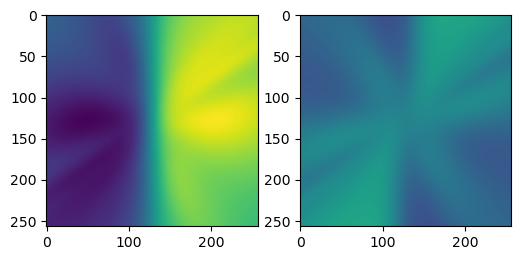

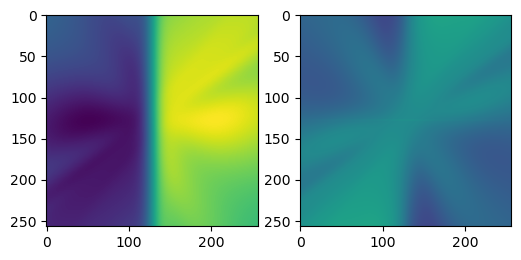

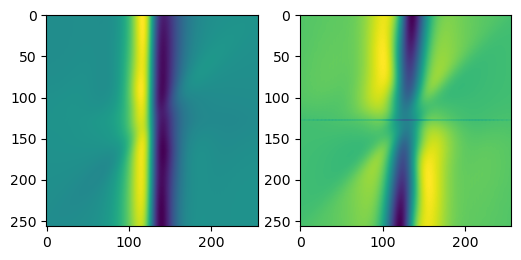

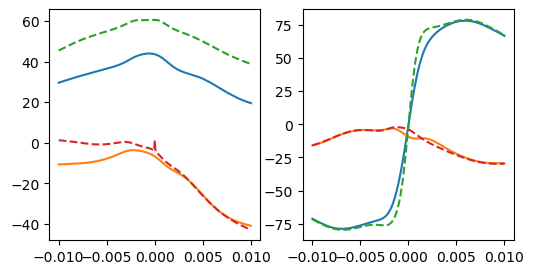

argmax(abs.(lhs .- rhs)) = CartesianIndex(229, 117)
norm(abs.(lhs .- rhs)) = 1934.03389772754
(ωs_ext[1])[1] = -0.01


-0.01

In [327]:
# heatmaps
fig, axs = subplots(1,2; figsize=(6,3))
vmax = maximum(abs.(lhs))
vmin = -vmax
axs[0].imshow(real.(lhs); vmin=vmin, vmax=vmax)
axs[1].imshow(imag.(lhs); vmin=vmin, vmax=vmax)
display(fig)

fig, axs = subplots(1,2; figsize=(6,3))
axs[0].imshow(real.(rhs); vmin=vmin, vmax=vmax)
axs[1].imshow(imag.(rhs); vmin=vmin, vmax=vmax)
display(fig)

fig, axs = subplots(1,2; figsize=(6,3))
diff = lhs.-rhs
axs[0].imshow(real.(diff))
axs[1].imshow(imag.(diff))
display(fig)


# cuts
fig, axs = subplots(1,2; figsize=(6,3))
idx = 142
axs[0].plot(ωs_ext[1], real.(lhs[:,idx]))
axs[0].plot(ωs_ext[1], imag.(lhs[:,idx]))
axs[0].plot(ωs_ext[1], real.(rhs[:,idx]); linestyle="--")
axs[0].plot(ωs_ext[1], imag.(rhs[:,idx]); linestyle="--")
axs[1].plot(ωs_ext[2], real.(lhs[idx,:]))
axs[1].plot(ωs_ext[2], imag.(lhs[idx,:]))
axs[1].plot(ωs_ext[2], real.(rhs[idx,:]); linestyle="--")
axs[1].plot(ωs_ext[2], imag.(rhs[idx,:]); linestyle="--")
display(fig)

@show argmax(abs.(lhs .- rhs))
@show norm(abs.(lhs .- rhs))
@show ωs_ext[1][1]

In [304]:
lhs = Gval[:,:,2,2,2]
rhs = zeros(ComplexF64, size(lhs))
for m in axes(rhs,1)
    for n in axes(rhs,2)
        rhs[m,n] = eval_3pt_FDT(G, T, m, n)
    end
end

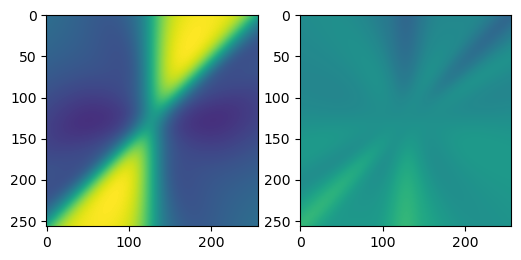

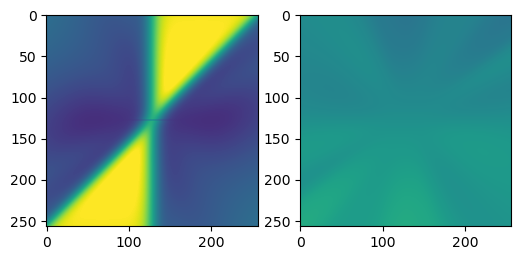

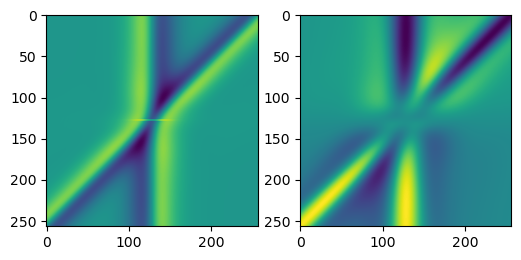

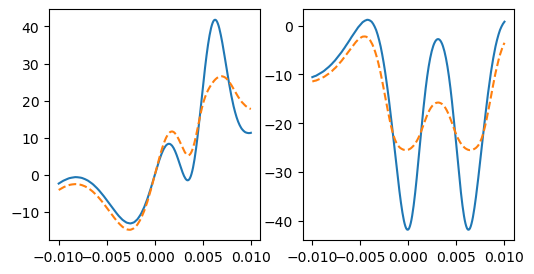

norm(lhs .- rhs) = 5286.161141551479


5286.161141551479

In [305]:
# heatmaps
fig, axs = subplots(1,2; figsize=(6,3))
vmax = maximum(abs.(lhs))
vmin = -vmax
axs[0].imshow(real.(lhs); vmin=vmin, vmax=vmax)
axs[1].imshow(imag.(lhs); vmin=vmin, vmax=vmax)
display(fig)

fig, axs = subplots(1,2; figsize=(6,3))
axs[0].imshow(real.(rhs); vmin=vmin, vmax=vmax)
axs[1].imshow(imag.(rhs); vmin=vmin, vmax=vmax)
display(fig)

fig, axs = subplots(1,2; figsize=(6,3))
diff = lhs.-rhs
axs[0].imshow(real.(diff))
axs[1].imshow(imag.(diff))
display(fig)

# cuts
fig, axs = subplots(1,2; figsize=(6,3))
idx = 50
# axs[0].plot(ωs_ext[1], real.(lhs[:,idx]))
axs[0].plot(ωs_ext[1], imag.(lhs[:,idx]))
# axs[0].plot(ωs_ext[1], real.(rhs[:,idx]); linestyle="--")
axs[0].plot(ωs_ext[1], imag.(rhs[:,idx]); linestyle="--")
# axs[1].plot(ωs_ext[2], real.(lhs[idx,:]))
axs[1].plot(ωs_ext[2], imag.(lhs[idx,:]))
# axs[1].plot(ωs_ext[2], real.(rhs[idx,:]); linestyle="--")
axs[1].plot(ωs_ext[2], imag.(rhs[idx,:]); linestyle="--")
display(fig)

@show norm(lhs .- rhs)